#### A 3D axial (cylinder) simulation


In [1]:
include("../resk.jl")
include("../reskplots.jl")

RESK successfully loaded.
RESKPlots successfully loaded.


Check if a shorter version with the same parameters works:

In [ ]:
Random.seed!(1234)
aa = rangeexp_cylinder_inf(0,2,1; r_max_burnin=10, r_max_exp=10, z_max_burnin=5, z_max_exp=250, data_to_generate="FP",capacity=100,prolif_rate=2,weightfitn=false,condsel=true,premutate=true,
    oneside=true, bottleneck=NaN, mut_rate=0.1, migr_rate=0.05, sel_coef=0.005, startfill_range=[1:21,1:21,1:5])

In [3]:
#aa["fitn"][:,:,3,1,1]

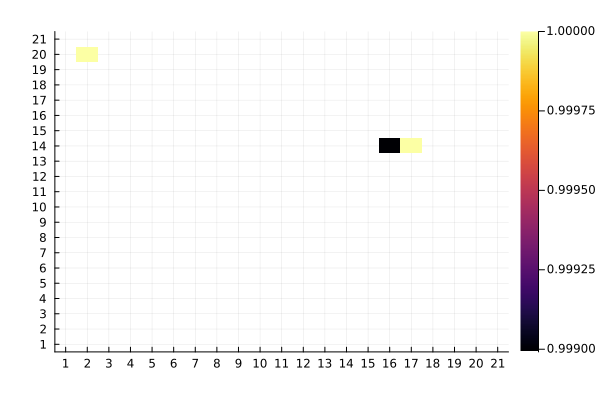

In [6]:
plt = Plots.heatmap(aa["fitn"][:,:,3,2,1],xticks=(1:1:21),yticks=(1:1:21))

In [2]:
function timeseries_mean(ts, n_gens)
    return [mean(ts[i,:]) for i in 1:n_gens]
end

timeseries_mean (generic function with 1 method)

In [3]:
oneD1nb = deserialize("data/3d_1nb.re")
oneD1nb_fitn_frontav = average_front(oneD1nb,"fitn";oneside=true)
oneD1nb_fitn_frontav_mean = timeseries_mean(oneD1nb_fitn_frontav, oneD1nb["stats"]["n_gens"])

300-element Vector{Float32}:
 1.0
 0.9996125
 0.9992059
 0.99888116
 0.9986063
 0.9980861
 0.9976904
 0.9972761
 0.9967874
 0.99640846
 ⋮
 0.8993866
 0.8989171
 0.89871377
 0.89829624
 0.8980314
 0.8977038
 0.89727354
 0.897092
 0.89669293

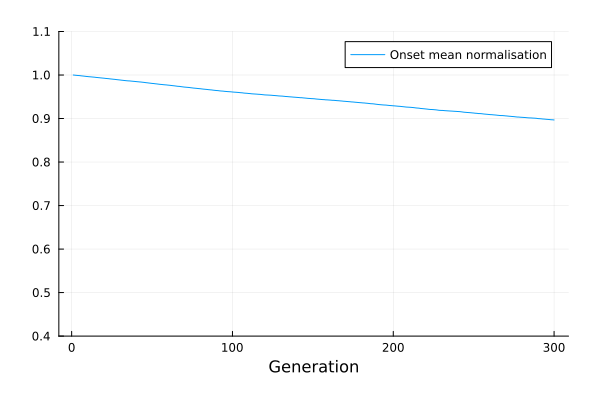

In [5]:
Plots.plot(oneD1nb_fitn_frontav_mean,label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1))

In [11]:
oneD1 = deserialize("data/3d_1.re")
oneD1_fitn_frontav = average_front(oneD1,"fitn";oneside=false)
oneD1_fitn_frontav_mean = timeseries_mean(oneD1_fitn_frontav, oneD1["stats"]["n_gens"])
oneD1_fitnN = norm_onset_mean(oneD1, "fitn")
oneD1_fitnN_frontav = average_front(oneD1_fitnN, oneD1["stats"]["n_gens"], oneD1["stats"]["max"]...; oneside=false)
oneD1_fitnN_frontav_mean = timeseries_mean(oneD1_fitnN_frontav, oneD1["stats"]["n_gens"])


500-element Vector{Float32}:
 1.0
 0.9991398
 0.9984768
 0.9976676
 0.9970657
 0.99596727
 0.99495876
 0.9940363
 0.9934616
 0.99287355
 ⋮
 0.70400316
 0.7037686
 0.70352304
 0.7032718
 0.7029744
 0.7026676
 0.7024396
 0.70218
 0.7019174

In [19]:
function norm_onset_mean2(re::Dict, dataname::String="fitn", offset::Int=0)
    norm_onset_mean2(re[dataname], re["stats"]["n_gens_burnin"], offset)
end

function norm_onset_mean2(data, n_gens_burnin::Int, offset::Int=0)
    normal_array = copy(data)
    n_re = size(data)[end]
    wlddim = length(size(data)) - 2

    for rep in 1:n_re
        sum = 0
        count = 0

        for u in data[repeat([:], wlddim)..., n_gens_burnin + 1 + offset, rep]
            if u > 0
                sum += u
                count += 1
            end
        end

        gen_average = sum / count
        println(gen_average)

        for i in (n_gens_burnin + 1 + offset):size(data, wlddim + 1)
            normal_array[repeat([:], wlddim)..., i, rep] ./= gen_average
        end
    end

    return normal_array
end

norm_onset_mean2 (generic function with 5 methods)

In [25]:
oneD1_fitnN[95:105,95:105,1000,1]

11×11 Matrix{Float32}:
 NaN  NaN  NaN  NaN         NaN         …  NaN         NaN         NaN
 NaN  NaN  NaN  NaN         NaN            NaN         NaN         NaN
 NaN  NaN  NaN  NaN         NaN            NaN         NaN         NaN
 NaN  NaN  NaN    0.743479    0.746754       0.799446    0.796657  NaN
 NaN  NaN  NaN    0.801271    1.07113        1.00144     0.826355  NaN
 NaN  NaN  NaN  NaN           1.1665    …    1.05795     0.770104  NaN
 NaN  NaN  NaN    1.17583     1.20394        1.11357     0.945138  NaN
 NaN  NaN  NaN    0.894238    1.11184        1.04956     0.690435  NaN
 NaN  NaN  NaN    0.725927    1.03747        0.993532    0.67377   NaN
 NaN  NaN  NaN    0.827109    0.758361       0.794293    0.774003  NaN
 NaN  NaN  NaN  NaN         NaN         …  NaN         NaN         NaN

In [20]:
oneD1_fitnN = norm_onset_mean2(oneD1, "fitn")

0.99169433
0.96801335
1.0046997
0.9905901
0.9681125
1.0298953
0.95802236
1.0466264
0.99204767
1.0052682
0.9771812
0.95450586
0.95301753
0.9833812
0.98361385
0.98362017
1.0506761
1.0359886
0.9980673
1.0670147


201×201×1500×20 Array{Float32, 4}:
[:, :, 1, 1] =
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  …  NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
   ⋮                        ⋮            ⋱         ⋮                        ⋮
 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN  NaN  NaN  NaN  NaN  NaN  NaN
 NaN  NaN  NaN

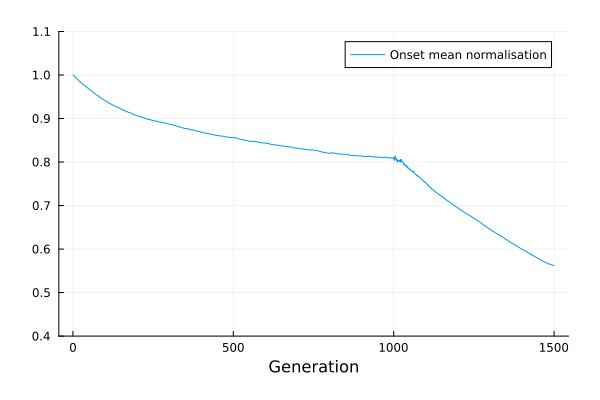

In [15]:
Plots.plot(oneD1nb_fitn_frontav_mean,label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1))

#MAKE NORMALISATION FOR CURVE ONLY

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_923ehGPc12.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_923ehGPc12.gif")
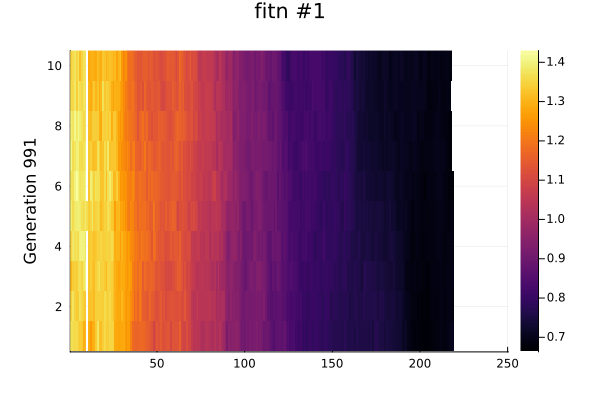

In [10]:
re_heatmap(oneD1,"fitn",450,500)

In [2]:
test = rangeexp_1d_inf(0,300,20;x_max_burnin=5,x_max_exp=500,data_to_generate="F",capacity=100,prolif_rate=2,mut_rate=0.05,migr_rate=0.05,sel_coef=0.005,weightfitn=false,condsel=true,oneside=true,premutate=true)

Dict{String, Any} with 5 entries:
  "pops"  => NaN
  "del"   => NaN
  "fitn"  => Float32[1.0 0.999593 … 0.951472 0.954648; 1.0 0.9995 … 0.948455 0.…
  "stats" => Dict{String, Any}("wlddim"=>1, "max_burnin"=>(5,), "name"=>"2024-0…
  "ben"   => NaN

In [5]:
test_fitn_frontav = average_front(test,"fitn";oneside=true)
test_fitn_frontav_mean = timeseries_mean(test_fitn_frontav, test["stats"]["n_gens"])
test_fitnN = norm_onset_mean(test, "fitn")
test_fitnN_frontav = average_front(test_fitnN, test["stats"]["n_gens"], test["stats"]["max"][1]; oneside=true)
test_fitnN_frontav_mean = timeseries_mean(test_fitnN_frontav, test["stats"]["n_gens"])

300-element Vector{Float32}:
 1.0
 0.99954796
 0.99902165
 0.99864024
 0.9976498
 0.99741554
 0.99684936
 0.9970232
 0.9967777
 0.996256
 ⋮
 0.9007408
 0.89923
 0.89918804
 0.898615
 0.8985041
 0.8994257
 0.897437
 0.897565
 0.896984

In [ ]:
Plots.plot!(test_fitnN_frontav_mean,label="Onset mean normalisation",xlabel="Generation",ylims=(0.4,1.1),xlims=(0,2500))